# Define

In [1]:
import requests

In [7]:
text = requests.get('https://www.gutenberg.org/files/1661/1661-0.txt').text

In [8]:
with open("sherlock-holmes.txt", "w") as text_file:
    text_file.write(text)

In [9]:
text = open("sherlock-holmes.txt","r").read()

In [47]:
import re
stop_pattern = '\.|\?|\!'
sentences = re.split(stop_pattern, text)
sentences = [re.sub("\r|\n"," ",s.lower()) for s in sentences]

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
has_sherlock = [True if re.search("sherlock|holmes", s) else False for s in sentences]
has_watson = [True if re.search("john|watson", s) else False for s in sentences]
df = pd.DataFrame({"text":sentences, "has_sherlock":has_sherlock, "has_watson": has_watson})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7519 entries, 0 to 7518
Data columns (total 3 columns):
text            7519 non-null object
has_sherlock    7519 non-null bool
has_watson      7519 non-null bool
dtypes: bool(2), object(1)
memory usage: 73.5+ KB


In [66]:
df.drop_duplicates()

,text,has_sherlock,has_watson
0,ï»¿ project gutenberg's the adventures of sher...,True,False
1,"you may copy it, give it away or re-use it u...",False,False
2,gutenberg,False,False
3,net title: the adventures of sherlock holmes...,True,False
4,a scandal in bohemia ii,False,False
5,the red-headed league iii,False,False
6,a case of identity iv,False,False
7,the boscombe valley mystery v,False,False
8,the five orange pips vi,False,False
9,the man with the twisted lip vii,False,False


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7519 entries, 0 to 7518
Data columns (total 3 columns):
text            7519 non-null object
has_sherlock    7519 non-null bool
has_watson      7519 non-null bool
dtypes: bool(2), object(1)
memory usage: 73.5+ KB


In [68]:
df.head()

,text,has_sherlock,has_watson
0,ï»¿ project gutenberg's the adventures of sher...,True,False
1,"you may copy it, give it away or re-use it u...",False,False
2,gutenberg,False,False
3,net title: the adventures of sherlock holmes...,True,False
4,a scandal in bohemia ii,False,False


In [81]:
import os
## extract a few features and create a pandas df
df['num_words'] = df['text'].apply(lambda x: len(x.split(" ")))
df['num_words'].values

array([31, 28,  1, ...,  1, 42,  7])

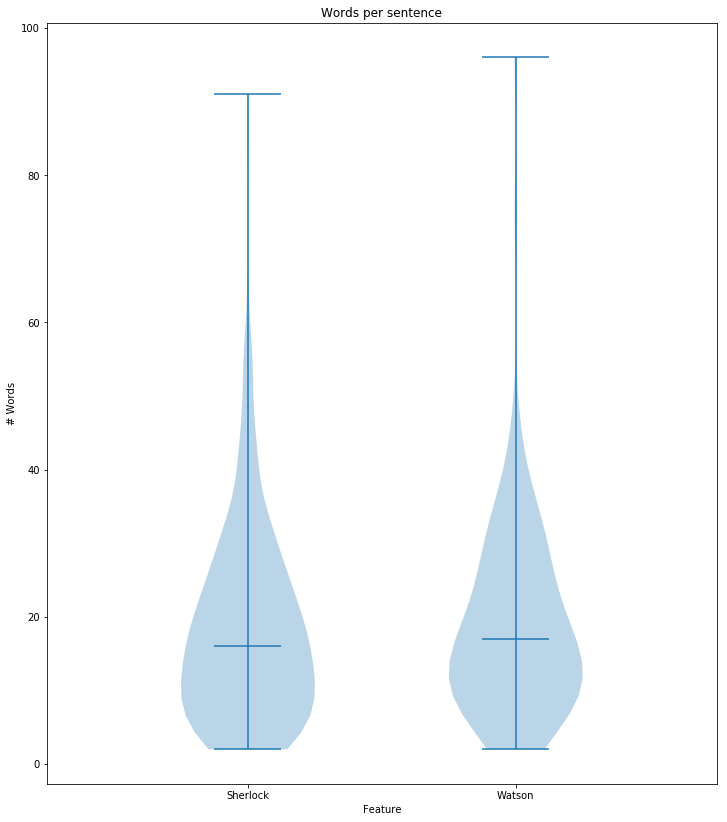

In [94]:
fig = plt.figure(figsize = (12, 14))
ax1 = fig.add_subplot(111)

data1 = df[df['has_sherlock'] == True]
data2 = df[df['has_watson'] == True]
data = [df[df[col]==True]['num_words'].values for col in ['has_sherlock', 'has_watson']]

pos = [1,2]
ax1.violinplot(data, pos, points=40, widths=0.5,showextrema=True, showmedians=True)

labels = ['Sherlock', 'Watson']
ax1.set_xticks(np.arange(1, len(labels) + 1))
ax1.set_xticklabels(labels)
ax1.set_xlim(0.25, len(labels) + 0.75)
ax1.set_xlabel('Feature')
ax1.set_ylabel('# Words')
ax1.set_title("Words per sentence")

plt.show()

# Ideat

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# extract the data to be used in the model from the df
labels = np.zeros(df.shape[0])
labels[(df['has_sherlock'] == True)] = 1
labels[(df['has_watson'] == True)] = 2
df['labels'] = labels
df = df[df['labels'] != 0]
X = df['text'].values
y = df['labels'].values

# Prototype

In [142]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [145]:
# carry out the train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

from sklearn.linear_model import SGDClassifier
test_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                        alpha=1e-3, random_state=42,
                        max_iter=5, tol=None))
])
test_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

# Testing

#### This is the production, testing and feedback loop stage

In [147]:
from sklearn import metrics
predicted = test_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted, target_names = ['sherlock', 'watson']))

              precision    recall  f1-score   support

    sherlock       0.98      1.00      0.99       150
      watson       1.00      0.92      0.96        36

   micro avg       0.98      0.98      0.98       186
   macro avg       0.99      0.96      0.97       186
weighted avg       0.98      0.98      0.98       186

